# Exploratory Data Analysis of Used Car Price in India


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
%matplotlib inline 


In [3]:
filepath = "C:/Users/Gaurav Tiwari/Desktop/Jupyter Notebook Files/car_data.csv"
df = pd.read_csv(filepath)
df.head()

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition
0,MarutiWagonR1.0LXI,312165,82238,2014,First Owner,Petrol + CNG,MANUAL,Expired,4.2
1,ToyotaEtiosLiva,313799,30558,2013,First Owner,Petrol,MANUAL,12-09-2021,4.4
2,MarutiAlto800,295999,22164,2018,First Owner,Petrol,MANUAL,01-12-2020,4.8
3,MarutiSwift,435199,30535,2013,First Owner,Diesel,MANUAL,Comp,4.3
4,MarutiWagonR1.0,289099,15738,2013,First Owner,Petrol,MANUAL,11-08-2021,4.3


In [4]:
df.tail()

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition
2232,MarutiWagonR1.0,385999,45263,2015,Second Owner,Petrol,MANUAL,10-06-2021,4.4
2233,MarutiSwift,324099,100335,2012,Second Owner,Petrol,MANUAL,02-08-2021,4.3
2234,HyundaiEonD,212299,28016,2011,First Owner,Petrol,MANUAL,Expired,3.2
2235,FordEcosport1.5AMBIENTE,378899,87947,2013,First Owner,Diesel,MANUAL,03-09-2021,4.2
2236,MarutiAltoK10,304299,33639,2015,First Owner,Petrol,MANUAL,17-10-2021,4.1


In [5]:
df.dtypes

Model                 object
Selling Price          int64
Kilometers Driven      int64
Year                   int64
Owner                 object
Fuel Type             object
Transmission          object
Insurance             object
Car Condition        float64
dtype: object

Correlation between datatypes of int64 and float64

In [6]:
df.corr()

,Selling Price,Kilometers Driven,Year,Car Condition
Selling Price,1.000000,-0.163254,0.568156,0.435813
Kilometers Driven,-0.163254,1.000000,-0.427502,-0.450421
Year,0.568156,-0.427502,1.000000,0.649011
Car Condition,0.435813,-0.450421,0.649011,1.000000


Finding the scatterplot of Car Condition and Selling Price 

(0.0, 2054822.2998605433)

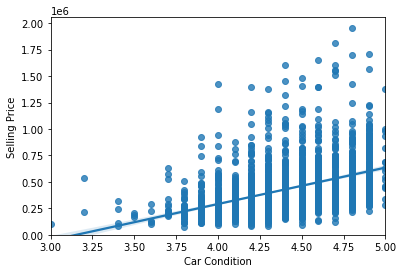

In [7]:
sns.regplot(x="Car Condition", y="Selling Price", data=df)
plt.ylim(0,)

We can notice that, as the car condition improves the selling price also increases.

Let's check the correlation between these variables.

In [8]:
df[["Car Condition", "Selling Price"]].corr()

,Car Condition,Selling Price
Car Condition,1.000000,0.435813
Selling Price,0.435813,1.000000


Here, the correlation is positive and around .436

Indicating that the relationship is between weak to moderate. 

Now let's check the correlation between Kilometers Driven and Selling Price

(0.0, 2077233.3208751814)

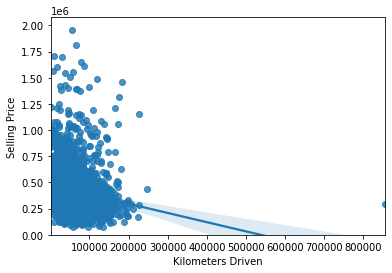

In [9]:
sns.regplot(x="Kilometers Driven", y="Selling Price", data=df)
plt.ylim(0,)

In [10]:
df[["Kilometers Driven","Selling Price"]].corr()

,Kilometers Driven,Selling Price
Kilometers Driven,1.000000,-0.163254
Selling Price,-0.163254,1.000000


We can see that there is no definitive relationship as the correlation value suggests at around -0.163

Visualizing categorical values using boxplot

<AxesSubplot:xlabel='Owner', ylabel='Selling Price'>

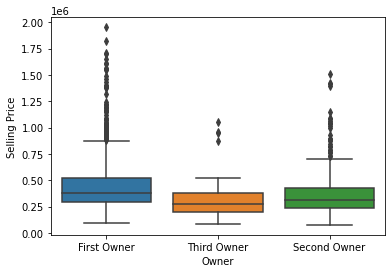

In [11]:
sns.boxplot(x="Owner", y="Selling Price", data=df)

This representation can suggest the relation between the owner and the price tag of the car, third owner will be selling at much cheaper rate compared to the other categories of owners.

Basic descriptive statistics

In [12]:
df.describe()

,Selling Price,Kilometers Driven,Year,Car Condition
count,2.237000e+03,2237.000000,2237.000000,2237.000000
mean,4.184431e+05,61928.605275,2013.763523,4.370854
std,2.280516e+05,42260.955917,2.874686,0.288990
min,7.529900e+04,913.000000,2006.000000,3.000000
25%,2.720990e+05,32137.000000,2012.000000,4.200000
50%,3.557990e+05,55430.000000,2014.000000,4.300000
75%,5.032990e+05,83427.000000,2016.000000,4.600000
max,1.952397e+06,855881.000000,2020.000000,5.000000


We can count the values of each variable

In [13]:
df['Year'].value_counts()

2012    314
2013    275
2014    252
2015    252
2017    212
2016    196
2011    179
2018    164
2010    137
2009     88
2019     82
2008     53
2007     23
2020      8
2006      2
Name: Year, dtype: int64

This suggests that the listing of 2012 cars is the most frequent among the years.

If we want to check the unique categories of fuel type

In [14]:
df["Fuel Type"].unique()

array(['Petrol + CNG', 'Petrol', 'Diesel', 'Petrol + LPG'], dtype=object)

Now we can groupby using the above categories to check the mean price of car fuel type.

In [46]:
df_group1 = df[['Fuel Type','Model', 'Selling Price']]
df_group1 = df_group1.groupby(['Fuel Type','Model'], as_index = False).mean()
df_group1.head(10)

,Fuel Type,Model,Selling Price
0,Diesel,AudiA62.0,1319868.0
1,Diesel,AudiA62.0TDIPREMIUM,1092599.0
2,Diesel,AudiQ335TDI,1652949.0
3,Diesel,BMW3Series,1105659.0
4,Diesel,BMW3Series320D,1018099.0
5,Diesel,BMWX1SDRIVE,841924.0
6,Diesel,ChevroletBeatPS,144097.0
7,Diesel,ChevroletCruzeLTZ,292099.0
8,Diesel,FiatGrandPuntoACTIVE,291099.0
9,Diesel,FiatGrandPuntoDYNAMIC,260199.0


In [47]:
group_pivot = df_group1.pivot(index = 'Fuel Type', columns='Model')
group_pivot=group_pivot.fillna(0) #To fill the null values in the pivot table formed
group_pivot

Selling Price                                             \
Model            AudiA62.0 AudiA62.0TDIPREMIUM AudiQ335TDI BMW3Series   
Fuel Type                                                               
Diesel           1319868.0           1092599.0   1652949.0  1105659.0   
Petrol                 0.0                 0.0         0.0        0.0   
Petrol + CNG           0.0                 0.0         0.0        0.0   
Petrol + LPG           0.0                 0.0         0.0        0.0   

                                                                    \
Model        BMW3Series320D BMW5Series BMWX1SDRIVE ChevroletBeatPS   
Fuel Type                                                            
Diesel            1018099.0        0.0    841924.0        144097.0   
Petrol                  0.0   551681.0         0.0             0.0   
Petrol + CNG            0.0        0.0         0.0             0.0   
Petrol + LPG            0.0        0.0         0.0             0.0   

                                                 ...  \
Model        ChevroletCruzeLTZ ChevroletSparkLS  ...   
Fuel Type                                        ...   
Diesel                292099.0              0.0  ...   
Petrol                     0.0         110599.0  ...   
Petrol + CNG               0.0              0.0  ...   
Petrol + LPG               0.0              0.0  ...   

                                                                     \
Model        VolkswagenPoloHIGHLINE1.6L VolkswagenPoloTRENDLINE1.2L   
Fuel Type                                                             
Diesel                              0.0                    266591.0   
Petrol                         347599.0                    224889.0   
Petrol + CNG                        0.0                         0.0   
Petrol + LPG                        0.0                         0.0   

                                                                     \
Model        VolkswagenPoloTrendline1.0L VolkswagenVentoCOMFORTLINE   
Fuel Type                                                             
Diesel                          0.000000                   387899.0   
Petrol                     631432.333333                        0.0   
Petrol + CNG                    0.000000                        0.0   
Petrol + LPG                    0.000000                        0.0   

                                                                   \
Model        VolkswagenVentoCOMFORTLINEMT VolkswagenVentoHIGHLINE   
Fuel Type                                                           
Diesel                                0.0              387495.875   
Petrol                           317299.0              298521.100   
Petrol + CNG                          0.0                   0.000   
Petrol + LPG                          0.0                   0.000   

                                                                          \
Model        VolkswagenVentoHIGHLINE1.2TSI VolkswagenVentoHIGHLINEPETROL   
Fuel Type                                                                  
Diesel                                 0.0                           0.0   
Petrol                            536049.0                      266599.0   
Petrol + CNG                           0.0                           0.0   
Petrol + LPG                           0.0                           0.0   

                                                                  
Model        VolkswagenVentoHIGHLINETDI VolkswagenVentoTRENDLINE  
Fuel Type                                                         
Diesel                         662979.0                 0.000000  
Petrol                              0.0            277965.666667  
Petrol + CNG                        0.0                 0.000000  
Petrol + LPG                        0.0                 0.000000  

[4 rows x 434 columns]

Using Heatmaps for Visualization

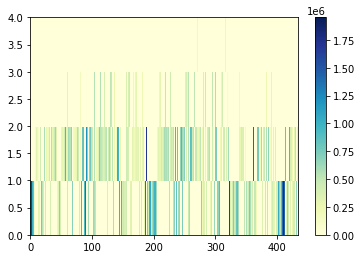

In [48]:
plt.pcolor(group_pivot, cmap='YlGnBu')
plt.colorbar()
plt.show()

Using Pearson correlation lets see the relation between Selling Price and Car Condition

In [50]:
pearson_coef, p_value = stats.pearsonr(df['Car Condition'], df['Selling Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.43581294038413754  with a P-value of P = 2.2873258548138916e-104


This suggests that the correlation between Car Condition and Selling Price is significant as P-value < 0.001 but the strength of relationship is not very strong as the Correlation Coefficient is around 0.456 approximately.

ANOVA : To test significance of difference of two means of variables 

In [52]:

group_test1=df_group1[['Fuel Type','Model', 'Selling Price', ]].groupby(['Fuel Type'])
group_test1.head(2)
df_group1



,Fuel Type,Model,Selling Price
0,Diesel,AudiA62.0,1319868.0
1,Diesel,AudiA62.0TDIPREMIUM,1092599.0
2,Diesel,AudiQ335TDI,1652949.0
3,Diesel,BMW3Series,1105659.0
4,Diesel,BMW3Series320D,1018099.0
...,...,...,...
507,Petrol + LPG,Hyundaii10MAGNA1.1,279599.0
508,Petrol + LPG,Hyundaii10SPORTZ,168899.0
509,Petrol + LPG,MarutiAlto,111699.0
510,Petrol + LPG,MarutiOMNIE8,168699.0


In [53]:
group_test1.get_group('Diesel')['Selling Price']


0      1319868.000
1      1092599.000
2      1652949.000
3      1105659.000
4      1018099.000
          ...     
182     501899.000
183     266591.000
184     387899.000
185     387495.875
186     662979.000
Name: Selling Price, Length: 187, dtype: float64

In [54]:
f_val, p_val = stats.f_oneway(group_test1.get_group('Diesel')['Selling Price'], group_test1.get_group('Petrol')['Selling Price'], group_test1.get_group('Petrol + CNG')['Selling Price'], group_test1.get_group('Petrol + LPG')['Selling Price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 22.01606059869656 , P = 2.036476870058278e-13
